# La calidad del aire en Bogotá, su impacto en los indicadores de salud y su pronóstico para el 2023 usando Inteligencia Artificial.

<br>
<br>

<img width="700" src="https://unperiodico.unal.edu.co/fileadmin/UN_Periodico_Digital/Imagenes/2019/10-octubre/1024/PM/UNPeriodico-1024-01.jpg">

<br>

Fuente de la imagen: https://unperiodico.unal.edu.co/pages/detail/la-calidad-del-aire-y-del-agua-retos-ambientales-para-los-gobernantes-de-bogota/



En Bogotá se han implementado distintas herramientas para medir la calidad del aire en toda la ciudad. Un de las más interesantes se trata del Índice Bogotano de Calidad del Aire, y se puede acceder a este a través del enlace: http://iboca.ambientebogota.gov.co/mapa/

La información acá registrada se va actualizando en tiempo real, y se visualiza en un mapa de la ciudad donde se identifican claramente lo que es registrado en las distintas estaciones de monitoreo.

Según el estudio de la Facultad de Economía de la Universidad de los Andes, 'Análisis de desigualdades múltiples y políticas de reducción de la contaminación', la distribución de los niveles de calidad del aire en Bogotá tiene una dinámica desigual, en donde solo 10% de sus habitantes respiran aire de buena calidad. Fuente: https://www.larepublica.co/salud-ejecutiva/los-niveles-de-calidad-del-aire-en-bogota-y-su-dinamica-desigual-entre-localidades-3323686

"Cuando yo le ofrezco un vaso de agua a una persona y el agua está contaminada, esa persona tiene la opción de no tomárselo. Pero en un lugar en donde el aire está contaminado, no le puedo decir a una persona: no respire". Este es la reflexión del ingeniero forestal Jorge Bonilla, quien sugiere priorizar la creación de políticas públicas enfocadas a mejorar la calidad del aire en Bogotá. Tomado de: https://uniandes.edu.co/es/noticias/ingenieria/la-desigualdad-de-la-calidad-del-aire-en-bogota

Accediendo a las bases de datos de https://datosabiertos.bogota.gov.co/ y https://oab.ambientebogota.gov.co/ vamos a realizar un ejercicio sencillo aplicando Ciencia de Datos e Inteligencia Artificial en Python. 

In [1]:
# Librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Definimos estilo para las gráficas:
sns.set_style("darkgrid")

## Bases de datos:

### 1. Concentración de Material Particulado Inferior a 10 Micrómetros {PM10} Promedio Mensual por Estación

Este set de datos contiene la concentración de Material Particulado Inferior a 10 Micrómetros por metro cúbico {PM10} Promedio Mensual por Estación - PM10PME

In [2]:
# Utilizamos la herramienta de pandas para abrir archivos csv:
pm10 = pd.read_csv('Data//OAB - PM10PM - La Ciudad.csv')
# Visualizamos el dataframe que hemos generado:
pm10

,Periodo,Valor
0,2006-12,51.900002
1,2007-01,66.500000
2,2007-02,100.500000
3,2007-03,91.900002
4,2007-04,66.400002
...,...,...
182,2022-02,41.000000
183,2022-03,38.000000
184,2022-04,31.000000
185,2022-05,31.000000


In [3]:
# identificamos tipo de objetos en el dataframe:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Periodo  187 non-null    object 
 1   Valor    187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [4]:
# Ajustamos el formato de la fecha:
pm10['Periodo'] = pd.to_datetime(pm10['Periodo'])
# Actualizamos el nombre de las columnas:
pm10.columns = ['Periodo', 'pm10']
pm10.tail()

,Periodo,pm10
182,2022-02-01,41.0
183,2022-03-01,38.0
184,2022-04-01,31.0
185,2022-05-01,31.0
186,2022-06-01,31.0


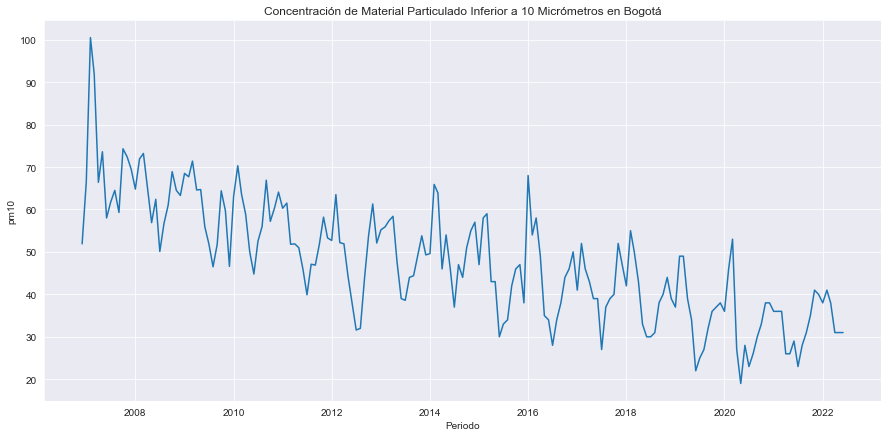

In [5]:
# Creamos una gráfica para observar el comportamiento histórico de estas partículas:
titulo = 'Concentración de Material Particulado Inferior a 10 Micrómetros en Bogotá'
plt.subplots(figsize=(15,7))
sns.lineplot(data=pm10, x = 'Periodo', y='pm10').set_title(titulo);
plt.show()

Los datos nos muestran que la concentración de estas partículas en el aire de la ciudad ha disminuido de forma constante, y adicionalmente se puede identificar algún comportamiento estacional.

In [6]:
# Creamos dos variables que nos indican el año y el mes:
pm10["Year"] = pm10["Periodo"].dt.year
pm10["Month"] = pm10["Periodo"].dt.month
pm10.tail()

,Periodo,pm10,Year,Month
182,2022-02-01,41.0,2022,2
183,2022-03-01,38.0,2022,3
184,2022-04-01,31.0,2022,4
185,2022-05-01,31.0,2022,5
186,2022-06-01,31.0,2022,6


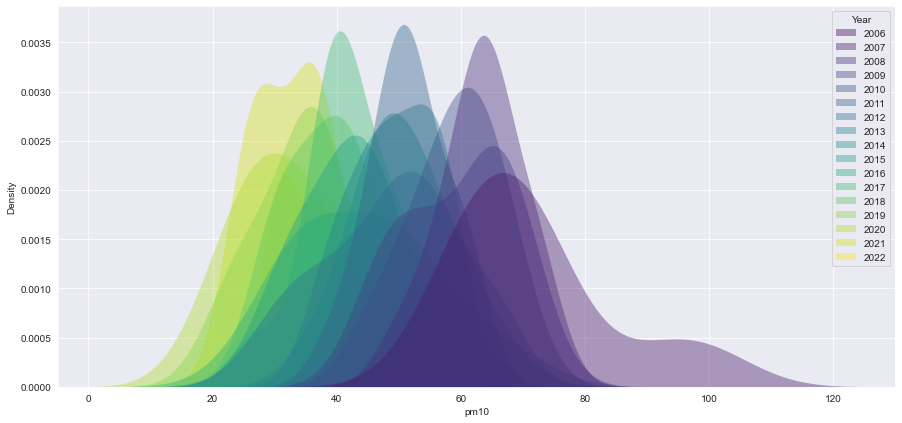

In [7]:
plt.subplots(figsize=(15,7))
sns.kdeplot(data = pm10, x="pm10", hue = 'Year', fill=True, alpha=.4, linewidth=0, palette = 'viridis')
plt.show()

La función de distribución de este material particulado se ha desplazado hacia la izquierda, lo que indica una disminución a lo largo de los años.

A continuación vamos a estandarizar los valores de las concentraciones a partir de su promedio y desviación estándar anual. Esto nos permite identificar el posible comportamiento estacional.

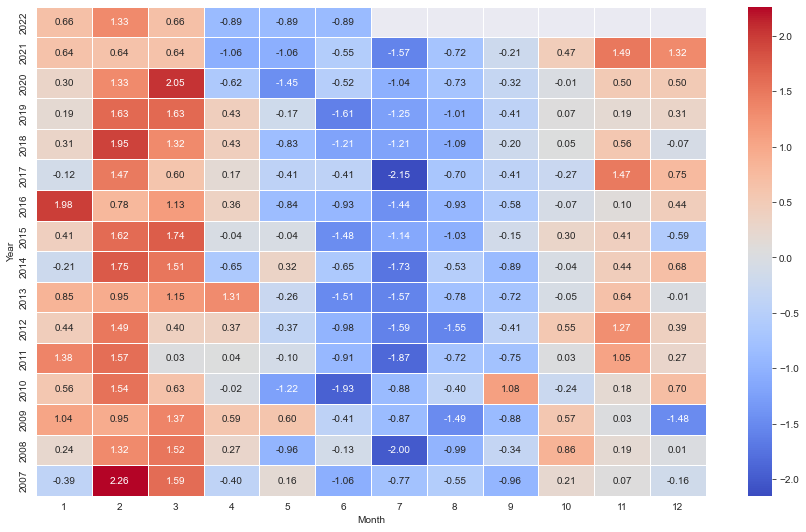

In [8]:
# Estandarización de los valores a partir de la media y desviación estándar de cada año:
pm10["Deviation"] = pm10["pm10"] - pm10.groupby("Year")["pm10"].transform("mean")
pm10["Deviation"] = pm10["Deviation"] / pm10.groupby("Year")["pm10"].transform("std")

# Mapa de Calor con los valores de la concentración de pm10 estandarizado:
plt.subplots(figsize=(15,9))
sns.heatmap(pd.pivot_table(pm10, values = "Deviation", columns = "Month", index = "Year", aggfunc = np.mean), 
            cmap = "coolwarm", annot = True, fmt =".2f", linewidths = 0.5)
plt.ylim(0,16)
plt.show()

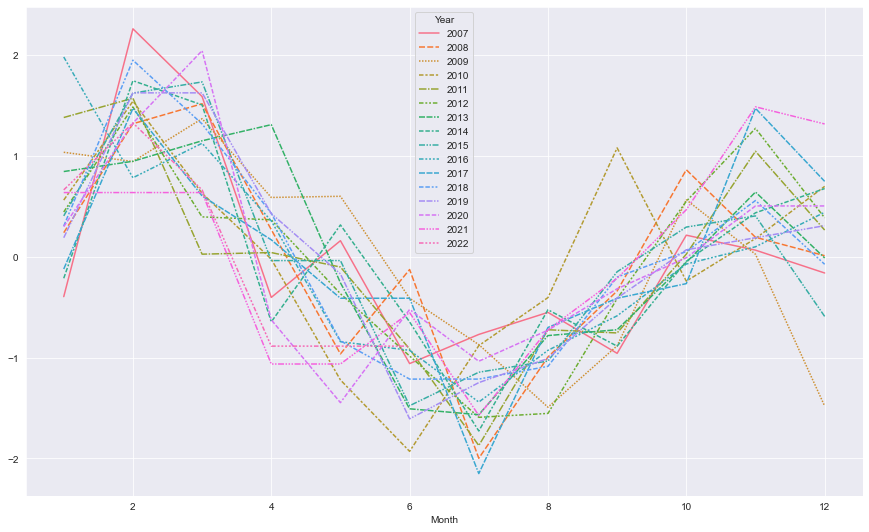

In [9]:
plt.subplots(figsize=(15,9))
sns.lineplot(data=pd.pivot_table(pm10, values = "Deviation", columns = "Year", index = "Month"))
plt.show()

Al estandarizar los registros históricos de esta manera podemos identificar claramente el comportamiento estacional del material particulado, en el que los valores mínimos del año se ubican a mitad del año y el pico más alto se encuentra entre febrero y marzo de cada año. 

**¿A qué se debe este fenómeno?**

### 2. Concentración de Material Particulado Inferior a 2.5 Micrómetros {PM2.5} Promedio Mensual por Estación

Este set de datos contiene la concentración de Material Particulado Inferior a 2.5 Micrómetros por metro cúbico {PM2.5} Promedio Mensual por Estación - PM2.5PME

In [10]:
pm2_5 = pd.read_csv('Data//OAB - PM25PME - La Ciudad.csv')

# Ajustamos formato de fecha:
pm2_5['Periodo'] = pd.to_datetime(pm2_5['Periodo'])
pm2_5

,Periodo,MOV,CBV,MAM,JAZ,PTE,MOV2,SCR,CSE,USM,...,CDAR,BOL,TUN,FTB,USQ,GYR,BOS,COL,KEN,LFR
0,2013-10-01,NaN,NaN,NaN,30.0,NaN,16.0,17.0,NaN,8.0,...,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-01,30.0,19.0,23.0,12.0,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-01,29.0,15.0,17.0,7.0,30.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,18.0,18.0,10.0,36.0,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-02-01,48.0,29.0,28.0,17.0,41.0,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-02-01,27.0,29.0,24.0,25.0,23.0,28.0,22.0,NaN,18.0,...,21.0,21.0,21.0,28.0,19.0,20.0,NaN,16.0,27.0,24.0
101,2022-03-01,22.0,23.0,19.0,20.0,20.0,27.0,19.0,NaN,18.0,...,17.0,19.0,20.0,25.0,18.0,18.0,NaN,14.0,26.0,20.0
102,2022-04-01,18.0,19.0,17.0,16.0,17.0,22.0,16.0,NaN,14.0,...,15.0,17.0,18.0,22.0,15.0,15.0,NaN,12.0,21.0,16.0
103,2022-05-01,16.0,15.0,13.0,12.0,13.0,18.0,10.0,34.0,8.0,...,11.0,13.0,17.0,14.0,8.0,12.0,NaN,8.0,17.0,11.0


En este caso tenemos las observaciones por estaciones, no en todos los casos contamos con los registros de los valores.

In [11]:
# una forma de contar los valores no registrados por estación es la siguiente:
pm2_5.isna().sum()

Periodo      0
MOV          1
CBV          3
MAM          5
JAZ          5
PTE          2
MOV2         4
SCR          6
CSE         15
USM         18
SUB         39
CDAR        60
BOL         67
TUN         90
FTB         90
USQ        100
GYR         99
BOS        105
COL         99
KEN         99
LFR         99
dtype: int64

In [12]:
# Para aproximarnos al valor global de la ciudad vamos a estimar el promedio mensual a través de las estaciones:
pm2_5['pm2_5'] = pm2_5.iloc[:,1:].mean(axis=1)
pm2_5

,Periodo,MOV,CBV,MAM,JAZ,PTE,MOV2,SCR,CSE,USM,...,BOL,TUN,FTB,USQ,GYR,BOS,COL,KEN,LFR,pm2_5
0,2013-10-01,NaN,NaN,NaN,30.0,NaN,16.0,17.0,NaN,8.0,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000
1,2013-11-01,30.0,19.0,23.0,12.0,33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.400000
2,2013-12-01,29.0,15.0,17.0,7.0,30.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.333333
3,2014-01-01,18.0,18.0,10.0,36.0,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.800000
4,2014-02-01,48.0,29.0,28.0,17.0,41.0,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-02-01,27.0,29.0,24.0,25.0,23.0,28.0,22.0,NaN,18.0,...,21.0,21.0,28.0,19.0,20.0,NaN,16.0,27.0,24.0,23.055556
101,2022-03-01,22.0,23.0,19.0,20.0,20.0,27.0,19.0,NaN,18.0,...,19.0,20.0,25.0,18.0,18.0,NaN,14.0,26.0,20.0,20.277778
102,2022-04-01,18.0,19.0,17.0,16.0,17.0,22.0,16.0,NaN,14.0,...,17.0,18.0,22.0,15.0,15.0,NaN,12.0,21.0,16.0,17.055556
103,2022-05-01,16.0,15.0,13.0,12.0,13.0,18.0,10.0,34.0,8.0,...,13.0,17.0,14.0,8.0,12.0,NaN,8.0,17.0,11.0,13.842105


**¿Qué otra estrategia podría funcionar para solucionar el inconveniente de la información perdida?**

A continuación visualizamos el record histórico de este material en el aire de la ciudad:

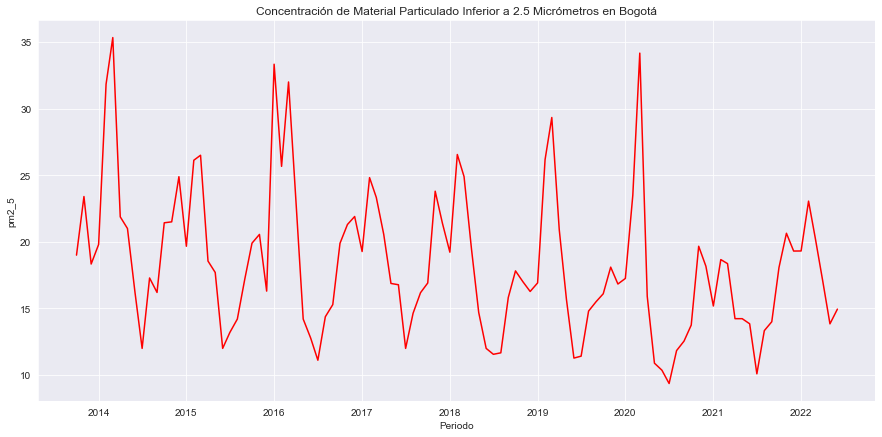

In [13]:
# Creamos una gráfica para observar el comportamiento histórico:
titulo = 'Concentración de Material Particulado Inferior a 2.5 Micrómetros en Bogotá'
plt.subplots(figsize=(15,7))
sns.lineplot(data=pm2_5, x = 'Periodo', y='pm2_5', color='r').set_title(titulo)
plt.show()

Distinto a lo encontrado anteriormente, el material particulado inferior a 2.5 micrómetros no presenta una tendencia a disminuir sino que se ha mantenido relativamente constante entre el 2014 y 2022. Por otra parte, también parece existir algún tipo de comportamiento estacional, así que generamos la misma visualización que utilizamos antes:

In [14]:
# Creamos dos variables que nos indican el año y el mes:
pm2_5["Year"] = pm2_5["Periodo"].dt.year
pm2_5["Month"] = pm2_5["Periodo"].dt.month
pm2_5.tail()

,Periodo,MOV,CBV,MAM,JAZ,PTE,MOV2,SCR,CSE,USM,...,FTB,USQ,GYR,BOS,COL,KEN,LFR,pm2_5,Year,Month
100,2022-02-01,27.0,29.0,24.0,25.0,23.0,28.0,22.0,NaN,18.0,...,28.0,19.0,20.0,NaN,16.0,27.0,24.0,23.055556,2022,2
101,2022-03-01,22.0,23.0,19.0,20.0,20.0,27.0,19.0,NaN,18.0,...,25.0,18.0,18.0,NaN,14.0,26.0,20.0,20.277778,2022,3
102,2022-04-01,18.0,19.0,17.0,16.0,17.0,22.0,16.0,NaN,14.0,...,22.0,15.0,15.0,NaN,12.0,21.0,16.0,17.055556,2022,4
103,2022-05-01,16.0,15.0,13.0,12.0,13.0,18.0,10.0,34.0,8.0,...,14.0,8.0,12.0,NaN,8.0,17.0,11.0,13.842105,2022,5
104,2022-06-01,12.0,18.0,12.0,14.0,14.0,20.0,11.0,34.0,11.0,...,16.0,11.0,12.0,NaN,9.0,18.0,13.0,14.947368,2022,6


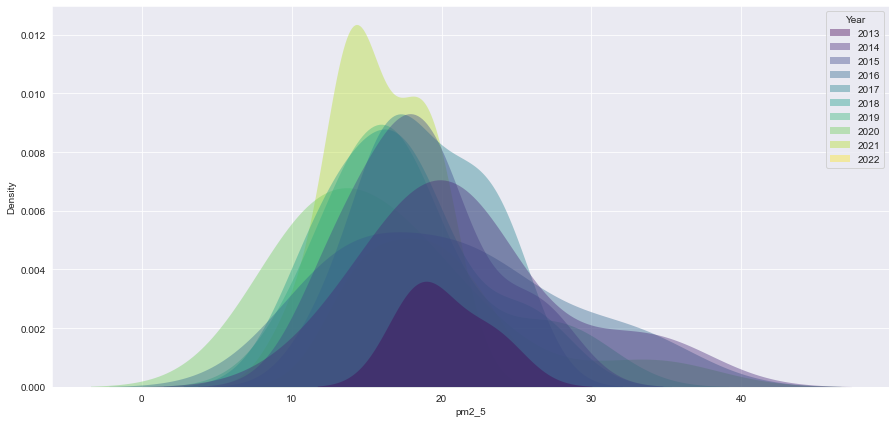

In [15]:
plt.subplots(figsize=(15,7))
sns.kdeplot(data = pm2_5, x="pm2_5", hue = 'Year', fill=True, alpha=.4, linewidth=0, palette = 'viridis')
plt.show()

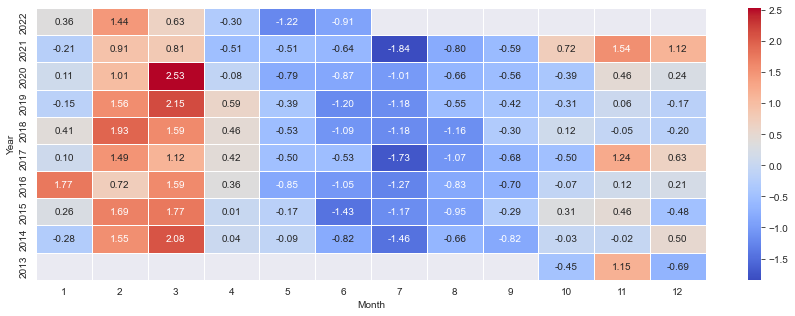

In [16]:
# Estandarización de los valores a partir de la media y desviación estándar de cada año:
pm2_5["Deviation"] = pm2_5["pm2_5"] - pm2_5.groupby("Year")["pm2_5"].transform("mean")
pm2_5["Deviation"] = pm2_5["Deviation"] / pm2_5.groupby("Year")["pm2_5"].transform("std")

# Mapa de Calor con los valores de la concentración de pm10 estandarizado:
plt.subplots(figsize=(15,5))
sns.heatmap(pd.pivot_table(pm2_5, values = "Deviation", columns = "Month", index = "Year", aggfunc = np.mean), 
            cmap = "coolwarm", annot = True, fmt =".2f", linewidths = 0.5)
plt.ylim(0,10)
plt.show()

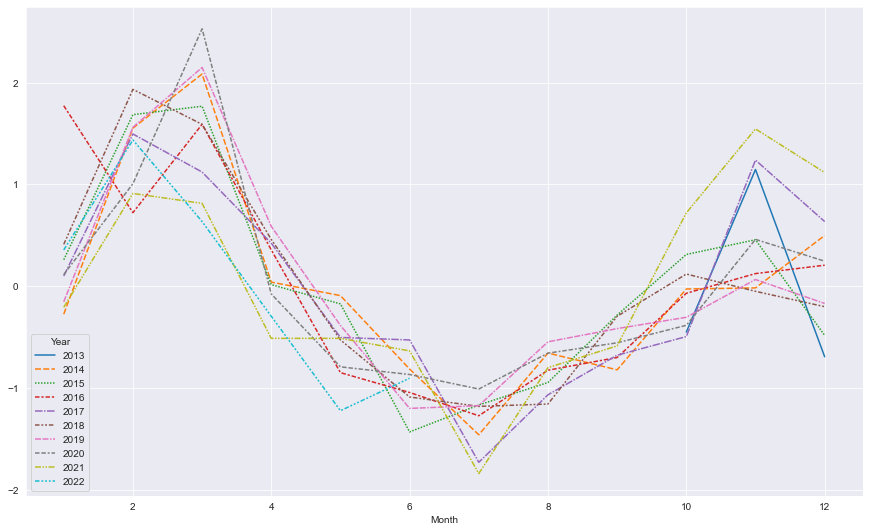

In [17]:
plt.subplots(figsize=(15,9))
sns.lineplot(data=pd.pivot_table(pm2_5, values = "Deviation", columns = "Year", index = "Month", aggfunc = np.mean))
plt.show()

Al estandarizar los registros del material particulado encontramos que el comportamiento estacional coincide en picos y valles con el que se había identificado anteriormente.

**¿Este comportamiento es coincidencia o se debe a fuentes contaminantes de origen común?**

Identifiquemos la relación que existe entre estas dos mediciones:

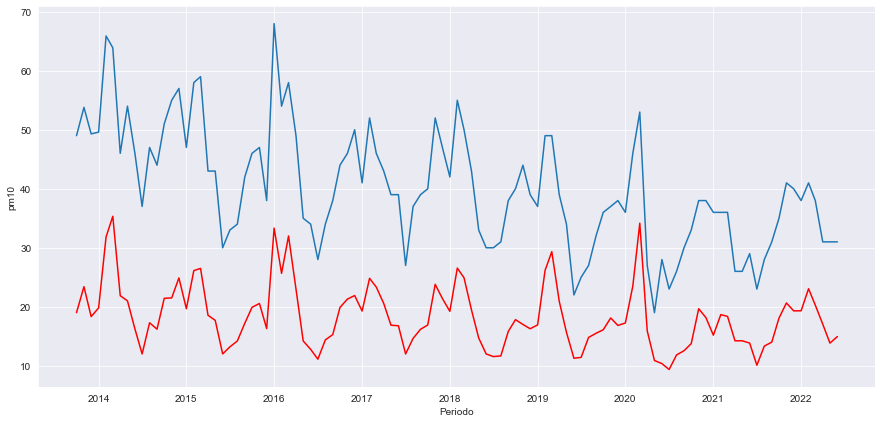

In [18]:
# Hacemos una copia del dataframe y tomamos los últimos 105 meses para que coincidan los dos dataframes:
pm10_c = pm10.tail(105).copy().reset_index(drop=True)

# Visualizamos ambos dataframe:
plt.subplots(figsize=(15,7))
sns.lineplot(data=pm10_c, x = 'Periodo', y='pm10')
sns.lineplot(data=pm2_5, x = 'Periodo', y='pm2_5', color='r');
plt.show()

Al comparar los valores estandarizados encontramos la siguiente relación entre las concentraciones:

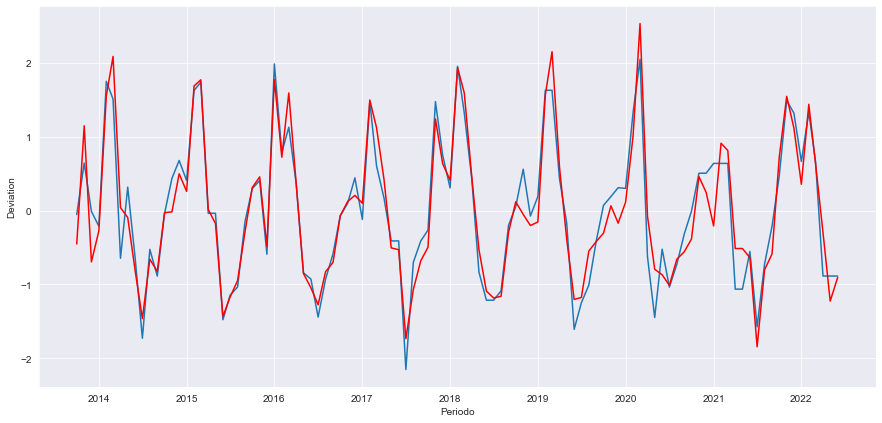

In [19]:
plt.subplots(figsize=(15,7))
sns.lineplot(data=pm10_c, x = 'Periodo', y='Deviation')
sns.lineplot(data=pm2_5, x = 'Periodo', y='Deviation', color='r');
plt.show()

Organizando esta información en un cuadro de dispersión obtenemos lo siguiente:

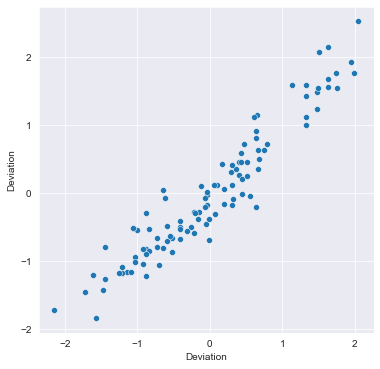

In [20]:
plt.subplots(figsize=(6,6))
sns.scatterplot(x = pm10_c['Deviation'], y = pm2_5['Deviation']);

In [21]:
# Correlación de los valores de concentración en sus niveles originales:
pm10_c['pm10'].corr(pm2_5['pm2_5'])

0.8951627688052318

In [22]:
# Correlación de los valores de concentración en sus niveles estandarizados:
pm10_c['Deviation'].corr(pm2_5['Deviation'])

0.9507348518022081

## Dióxido de Nitrógeno y Dióxido de Azufre


El $NO_2$ es un gas de color pardo rojizo, fuertemente tóxico, cuya presencia en el aire de los centros urbanos se debe a la oxidación del nitrógeno atmosférico que se utiliza en los procesos de combustión en los vehículos y fábricas. El $NO_2$ participa en las reacciones atmosféricas que dan lugar a la formación del ozono ($O_3$) y material particulado secundario. Este indicador muestra las concentraciones anuales de $NO_2$ en el aire, que al respirar pueden afectar los pulmones y las vías respiratorias. 

El indicador del Dióxido de Azufre muestra las concentraciones anuales de $SO_2$ en el aire, que al respirar pueden entran en el tracto respiratorio y causar efectos negativos en la salud pública del Distrito.

In [23]:
NO2 = pd.read_csv('Data//OAB - NO2 - La Ciudad.csv')
NO2['Periodo'] = pd.to_datetime(NO2['Periodo'], format='%Y').dt.year
NO2.pop('Valor')
NO2.tail()

,Periodo,NO2ppb
12,2017,13.0
13,2018,18.0
14,2019,18.0
15,2020,16.0
16,2021,15.4


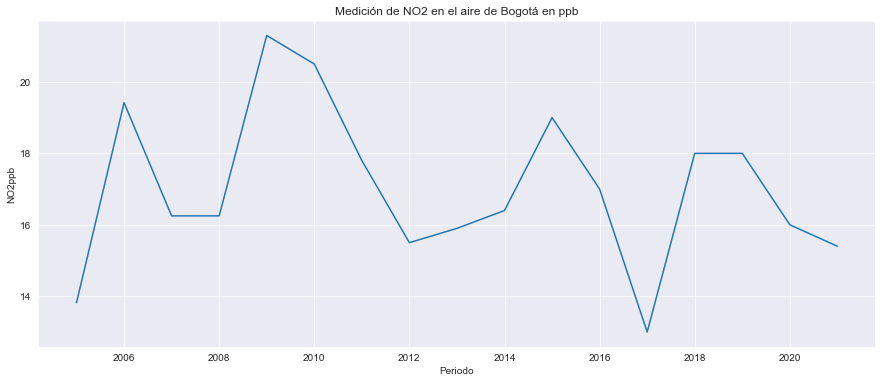

In [24]:
title = 'Medición de NO2 en el aire de Bogotá en ppb'
plt.subplots(figsize=(15,6))
sns.lineplot(data =NO2, x = 'Periodo', y = 'NO2ppb').set_title(title);

El dióxido de nitrógeno presenta una concentración en el aire de entre 14ppb y hasta 22ppb entre el 2005 y el 2021. Sin embargo, los datos son promedios anuales. 

**¿Qué desventaja tiene utilizar datos agrupados de esta forma?**

In [25]:
SO2 = pd.read_csv('Data//OAB - SO2 - La Ciudad.csv')
SO2['Periodo'] = pd.to_datetime(SO2['Periodo'], format='%Y').dt.year
SO2.pop('Valor')
SO2.tail()

,Periodo,SO2ppb
18,2017,2.3
19,2018,1.6
20,2019,2.3
21,2020,1.8
22,2021,2.0


In [26]:
# Una forma de combinar los dos dataframes:
NO2SO2 = pd.concat([NO2, SO2.tail(17).reset_index(drop=True)['SO2ppb']], axis=1)
NO2SO2

,Periodo,NO2ppb,SO2ppb
0,2005,13.82,9.0
1,2006,19.42,6.1
2,2007,16.25,6.8
3,2008,16.25,9.2
4,2009,21.30,9.2
5,2010,20.50,3.8
6,2011,17.80,3.7
7,2012,15.50,2.7
8,2013,15.90,3.3
9,2014,16.40,1.6


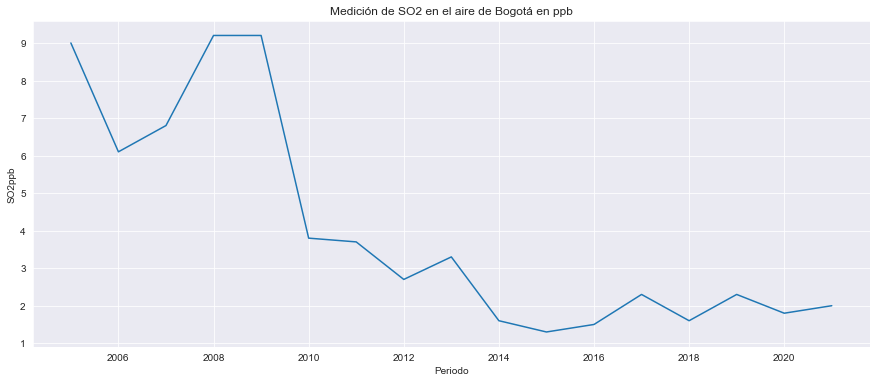

In [27]:
title = 'Medición de SO2 en el aire de Bogotá en ppb'
plt.subplots(figsize=(15,6))
sns.lineplot(data =NO2SO2, x = 'Periodo', y = 'SO2ppb').set_title(title);

Contrastando la observación anterior, el nivel de $SO_2$ en Bogotá ha disminuido significativamente desde el año 2000 hasta el 2020, pasando de concentraciones de 16ppb a 2ppb. 

**¿A qué factores se debe este comportamiento?**

Es un gas que se origina sobre todo durante la combustión de carburantes fósiles que contienen azufre (petróleo, combustibles sólidos), llevada a cabo sobre todo en los procesos industriales de alta temperatura y de generación eléctrica.

En los últimos años se ha producido un descenso acusado de las emisiones de SO2 producidas por la combustión en industrias de producción de energía debido a diversos factores, como el Plan 2007 de Reducción de Emisiones de Grandes Instalaciones de Combustión (GICs), que obligó a la **introducción de tecnologías de desulfuración**.

El principal emisor de SO2 es el sector industrial, con lo cual la distribución temporal de los niveles de SO2 suele venir determinada por los periodos en los que la industria emisora que afecta a la estación está en funcionamiento. Fuente: https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/salud/dioxido-azufre.aspx#:~:text=Origen,temperatura%20y%20de%20generaci%C3%B3n%20el%C3%A9ctrica.

**¿Qué tan relacionados están estos dos contaminantes en el aire?**

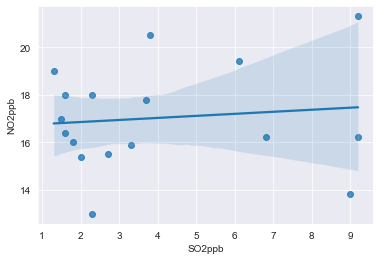

In [28]:
sns.regplot(x=NO2SO2['SO2ppb'], y=NO2SO2['NO2ppb']);

La gráfica anterior nos indica que aunque ambos compuestos químicos tienen su origen en la combustión, no existe una relación muy fuerte entre ambas variables porque la recta que representa la forma de la regresión lineal entre estas variables es horizontal.

## Prevalencia de sibilancias en adultos mayores de 60 años en Bogotá

Esta base de datos contiene el porcentaje de sibilancias reportadas en población de más de 60 años encuestada.

In [29]:
sibilancia60 = pd.read_csv('Data//obs_sibilancia60.csv', encoding='latin', sep=';')
sibilancia60.tail(10)

,Área,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Año
710,Rafael Uribe Uribe,No asegurado,0,0,1,0.0,2021
711,Rafael Uribe Uribe,Especial,0,0,3,1.0,2021
712,Ciudad Bolívar,Contributivo,3,4,47,111.0,2021
713,Ciudad Bolívar,Subsidiado,6,9,46,108.0,2021
714,Ciudad Bolívar,No asegurado,0,0,1,1.0,2021
715,Ciudad Bolívar,Especial,0,0,2,2.0,2021
716,Distrito,Contributivo,32,31,812,1438.0,2021
717,Distrito,Subsidiado,14,26,340,714.0,2021
718,Distrito,No asegurado,0,0,16,15.0,2021
719,Distrito,Especial,1,1,42,90.0,2021


In [30]:
# Ajustamos el tipo de dato de las columnas:
sibilancia60['Mujeres encuestadas'] = sibilancia60['Mujeres encuestadas'].astype(int)

# Filtramos dataframe para identificar solamente la información consolidada del distrito:
distrito_sibilancia60 = sibilancia60[sibilancia60['Área'] == 'Distrito']

# Convertimos la columna de año en el formato correspondiente:
distrito_sibilancia60['Año'] = pd.to_datetime(distrito_sibilancia60['Año'], format='%Y').dt.year

# Calculamos el porcentaje de Mujeres y Hombres con Sibilancia:
distrito_sibilancia60['Msibil'] = distrito_sibilancia60['Mujeres con sibilancias'] / distrito_sibilancia60['Mujeres encuestadas']
distrito_sibilancia60['Hsibil'] = distrito_sibilancia60['Hombres con sibilancias'] / distrito_sibilancia60['Hombres encuestados']
distrito_sibilancia60['Sibil'] = distrito_sibilancia60['Mujeres con sibilancias'] + distrito_sibilancia60['Hombres con sibilancias']
distrito_sibilancia60['Sibil'] = distrito_sibilancia60['Sibil'] / (distrito_sibilancia60['Mujeres encuestadas'] + distrito_sibilancia60['Hombres encuestados'])

# Definimos las columnas que queremos seleccionar:
distrito_sibilancia60 = distrito_sibilancia60[['Régimen', 'Msibil', 'Hsibil', 'Sibil', 'Año']]
distrito_sibilancia60

,Régimen,Msibil,Hsibil,Sibil,Año
76,Contributivo,0.075561,0.071429,0.074573,2013
77,Subsidiado,157.000000,0.108392,0.382199,2013
78,No asegurado,0.000000,0.000000,0.000000,2013
79,Especial,0.044444,0.000000,0.033898,2013
156,Contributivo,0.131102,0.143750,0.133409,2014
157,Subsidiado,0.104901,0.133588,0.113811,2014
158,No asegurado,0.250000,0.000000,0.142857,2014
159,Especial,0.184211,0.000000,0.162791,2014
236,Contributivo,0.067194,0.058419,0.064762,2015
237,Subsidiado,88.000000,0.081129,0.235915,2015


El dataframe anterior nos muestra una anomalía en los porcentajes de sibilancias en mujeres, por lo menos para los años 2013, 2015, 2018 y 2019. Vamos a inspeccionar los valores que originan esta anormalidad:

In [31]:
sibilancia60[sibilancia60['Año'] == 2013].tail(5)

,Área,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Año
75,Ciudad Bolívar,Especial,0,0,0,0,2013
76,Distrito,Contributivo,19,64,266,847,2013
77,Distrito,Subsidiado,62,157,572,1,2013
78,Distrito,No asegurado,0,0,16,20,2013
79,Distrito,Especial,0,2,14,45,2013


Encontramos que en el Distrito, en el Régimen Subsidiado, hay reportadas 157 mujeres con sibilancia, pero solo encuestaron a una. 

A continuación vamos a identificar si esta anomalía se presentó en otras oportunidades:

In [32]:
condicion = sibilancia60['Mujeres encuestadas'] < sibilancia60['Mujeres con sibilancias']
sibilancia60[condicion]

,Área,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Año
77,Distrito,Subsidiado,62,157,572,1,2013
237,Distrito,Subsidiado,46,88,567,1,2015
477,Distrito,Subsidiado,65,112,656,1,2018
556,Distrito,Contributivo,41,103,542,1,2019


Encontramos que esta anomalía en la base de datos se da de la misma forma en 4 oportunidades, particularmente en los años 2013, 2015, 2018 y 2019.

Con este resultado vamos a agregar los datos del distrito sumando la información correspondiente a cada área de la ciudad:

In [33]:
# Excluimos del dataframe los valores que estén marcados como Distrito en la columna de Área:
condicion = sibilancia60['Área'] != 'Distrito'
no_dis_sibilancia60 = sibilancia60[condicion]
# Agrupamos los valores en función del Año y el Régimen:
no_dis_sibilancia60 = no_dis_sibilancia60.groupby(['Año', 'Régimen'], axis =0).sum().reset_index()
no_dis_sibilancia60

,Año,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas
0,2013,Contributivo,19,64,266,847
1,2013,Especial,0,2,14,45
2,2013,No asegurado,0,0,16,20
3,2013,Subsidiado,62,157,572,1276
4,2014,Contributivo,23,94,160,717
5,2014,Especial,0,7,5,38
6,2014,No asegurado,0,1,3,4
7,2014,Subsidiado,70,122,524,1163
8,2015,Contributivo,17,51,291,759
9,2015,Especial,1,3,19,29


Ahora verificamos que no exista la anomalía detectada anteriormente para mujeres y hombres:

In [34]:
condicion = no_dis_sibilancia60['Mujeres encuestadas'] < no_dis_sibilancia60['Mujeres con sibilancias']
no_dis_sibilancia60[condicion]

,Año,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas


In [35]:
condicion = no_dis_sibilancia60['Hombres encuestados'] < no_dis_sibilancia60['Hombres con sibilancias']
no_dis_sibilancia60[condicion]

,Año,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas


Los dataframes resultado de la inspección no contienen datos, esto significa que en ningún caso hay más personas con sibilancias que encuestados.

Ahora calculamos nuevamente los porcentajes correspondientes:

In [36]:
# Ajustamos el tipo de dato de las columnas:
no_dis_sibilancia60['Mujeres encuestadas'] = no_dis_sibilancia60['Mujeres encuestadas'].astype(int)

# Convertimos la columna de año en el formato correspondiente:
no_dis_sibilancia60['Año'] = pd.to_datetime(no_dis_sibilancia60['Año'], format='%Y').dt.year

# Calculamos el porcentaje de Mujeres y Hombres con Sibilancia:
no_dis_sibilancia60['Msibil'] = no_dis_sibilancia60['Mujeres con sibilancias'] / no_dis_sibilancia60['Mujeres encuestadas']
no_dis_sibilancia60['Hsibil'] = no_dis_sibilancia60['Hombres con sibilancias'] / no_dis_sibilancia60['Hombres encuestados']
no_dis_sibilancia60['Sibil'] = no_dis_sibilancia60['Mujeres con sibilancias'] + no_dis_sibilancia60['Hombres con sibilancias']
no_dis_sibilancia60['Sibil'] = no_dis_sibilancia60['Sibil'] / (no_dis_sibilancia60['Mujeres encuestadas'] + no_dis_sibilancia60['Hombres encuestados'])
no_dis_sibilancia60['Encuestados'] = no_dis_sibilancia60['Mujeres encuestadas'] + no_dis_sibilancia60['Hombres encuestados']

# Le asignamos el nombre correspondiente al dataframe:
distrito_sibilancia60 = no_dis_sibilancia60
distrito_sibilancia60

,Año,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Msibil,Hsibil,Sibil,Encuestados
0,2013,Contributivo,19,64,266,847,0.075561,0.071429,0.074573,1113
1,2013,Especial,0,2,14,45,0.044444,0.000000,0.033898,59
2,2013,No asegurado,0,0,16,20,0.000000,0.000000,0.000000,36
3,2013,Subsidiado,62,157,572,1276,0.123041,0.108392,0.118506,1848
4,2014,Contributivo,23,94,160,717,0.131102,0.143750,0.133409,877
5,2014,Especial,0,7,5,38,0.184211,0.000000,0.162791,43
6,2014,No asegurado,0,1,3,4,0.250000,0.000000,0.142857,7
7,2014,Subsidiado,70,122,524,1163,0.104901,0.133588,0.113811,1687
8,2015,Contributivo,17,51,291,759,0.067194,0.058419,0.064762,1050
9,2015,Especial,1,3,19,29,0.103448,0.052632,0.083333,48


A continuación graficamos la evolución de los porcentajes de casos de sibilancias en los últimos años según el régimen al que pertenecen:

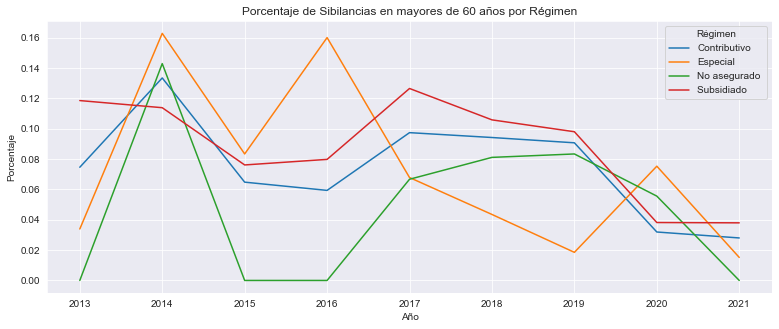

In [37]:
plt.subplots(figsize=(13,5))
sns.lineplot(data=distrito_sibilancia60, x='Año', y='Sibil', hue='Régimen')
plt.title('Porcentaje de Sibilancias en mayores de 60 años por Régimen')
plt.ylabel('Porcentaje')
plt.show()

Se encuentra que de forma consistente estos han disminuido desde el 2017. Sin embargo, en el régimen especial se encuentra una subida de casos en el 2020.

In [82]:
# Agrupamos por año sumando los registros de cada régimen:
columnas = ['Año', 'Mujeres con sibilancias', 'Mujeres encuestadas', 'Hombres con sibilancias', 'Hombres encuestados']
sibilancias_anual = distrito_sibilancia60[columnas].groupby('Año').sum().reset_index()
sibilancias_anual['MSibil'] = sibilancias_anual['Mujeres con sibilancias'] / sibilancias_anual['Mujeres encuestadas']
sibilancias_anual['HSibil'] = sibilancias_anual['Hombres con sibilancias'] / sibilancias_anual['Hombres encuestados']
sibilancias_anual['Sibil'] = sibilancias_anual['Mujeres con sibilancias'] + sibilancias_anual['Mujeres con sibilancias']
sibilancias_anual['Sibil'] = sibilancias_anual['Sibil'] / (sibilancias_anual['Mujeres encuestadas'] + sibilancias_anual['Hombres encuestados'])
sibilancias_anual['Año'] = pd.to_datetime(sibilancias_anual['Año'], format='%Y')
sibilancias_anual

,Año,Mujeres con sibilancias,Mujeres encuestadas,Hombres con sibilancias,Hombres encuestados,MSibil,HSibil,Sibil
0,2013-01-01,223,2188,81,868,0.101920,0.093318,0.145942
1,2014-01-01,224,1922,93,692,0.116545,0.134393,0.171385
2,2015-01-01,142,1995,64,889,0.071178,0.071991,0.098474
3,2016-01-01,116,1499,35,563,0.077385,0.062167,0.112512
4,2017-01-01,180,1632,87,731,0.110294,0.119015,0.152349
5,2018-01-01,178,1771,87,854,0.100508,0.101874,0.135619
6,2019-01-01,165,1665,67,916,0.099099,0.073144,0.127857
7,2020-01-01,49,1551,33,691,0.031593,0.047757,0.043711
8,2021-01-01,58,2257,47,1210,0.025698,0.038843,0.033458


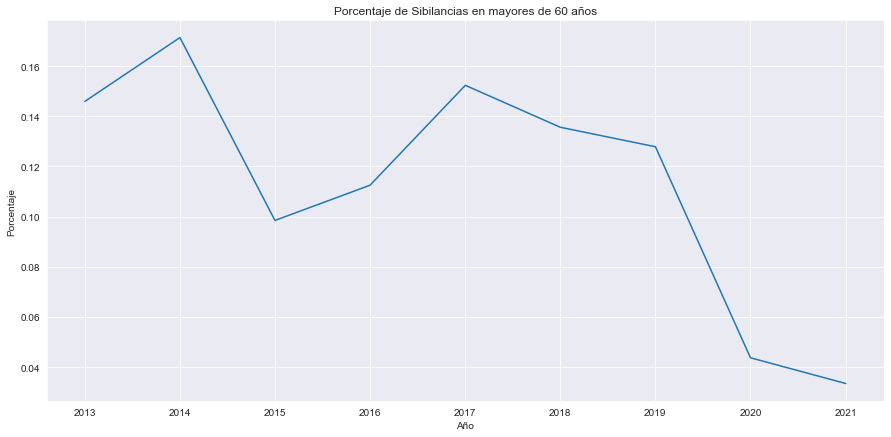

In [83]:
plt.subplots(figsize=(15,7))
sns.lineplot(data=sibilancias_anual, y='Sibil', x='Año')
plt.title('Porcentaje de Sibilancias en mayores de 60 años')
plt.ylabel('Porcentaje')
plt.show()

En términos generales, la ciudad está registrando consistentemente menores porcentajes de casos de sibilancias en mayores de 60 años desde el 2017. Este podría estar influenciado por una mejor calidad del aire en la Ciudad. 

Gráficamente procedemos a comparar la evolución de esta variable junto con la concentración de pm10 en el aire durante los periodos en los que coincide la información:

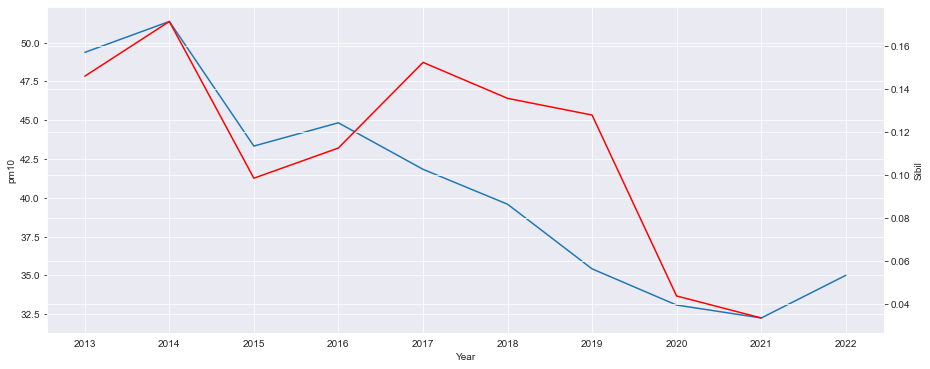

In [85]:
# Ajustamos el tamaño de la gráfica:
plt.subplots(figsize=(15,6))
# Calculamos la concentración promedio de pm10 para los últimos diez años:
pm10_anual = pm10.groupby('Year').mean().tail(10)
# Definimos el formato de fecha para este dataframe:
index = pm10_anual.index
index = pd.to_datetime(index, format='%Y')
# Graficamos la concentración media anual de pm10 en Bogotá:
sns.lineplot(data=pm10.groupby('Year').mean().tail(10), x = index, y='pm10')
# Asignamos un segundo eje a la misma gráfica:
ax2 = plt.twinx()
# Agregamos la gráfica del porcentaje de sibilancias en mayores de 60 años en Bogotá:
sns.lineplot(data=sibilancias_anual, y='Sibil', x='Año', color='r')
plt.show()

El resultado anterior nos sugiere que puede existir una relación de causalidad entre estas dos variables, donde la disminución de la concentración de pm10 en el aire se refleja en una menor proporción de casos de sibilancias. 

A continuación estimamos la relación de estas dos variables:

In [41]:
# Creamos nuevo dataframe conteniendo la información requerida:
sibil_pm10 = pd.concat([sibilancias_anual, pm10_anual.reset_index()], axis=1)[['Year', 'Sibil', 'pm10']].iloc[:-1,:]
# Ajustamos el formato de la fecha:
sibil_pm10['Year'] = pd.to_datetime(sibil_pm10['Year'], format='%Y').dt.year
sibil_pm10

,Year,Sibil,pm10
0,2013,0.145942,49.375000
1,2014,0.171385,51.366667
2,2015,0.098474,43.333333
3,2016,0.112512,44.833333
4,2017,0.152349,41.833333
5,2018,0.135619,39.583333
6,2019,0.127857,35.416667
7,2020,0.043711,33.083333
8,2021,0.033458,32.250000


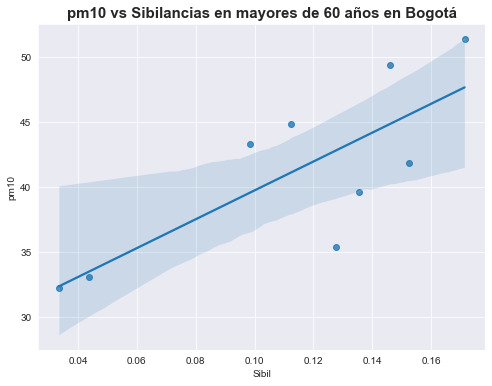

In [42]:
fig = plt.figure(figsize = (8, 6))
sns.regplot(data = sibil_pm10, x = 'Sibil', y ='pm10')
plt.title('pm10 vs Sibilancias en mayores de 60 años en Bogotá', weight='bold', fontsize = 15)
plt.show()

A partir del resultado anterior vamos a entrenar una red neuronal que cuantifique la relación entre estas variables correspondientes a la calidad del aire y el porcentaje de sibilancias:

In [43]:
pm2_5[['Year', 'pm2_5']].groupby('Year').mean().reset_index().iloc[:-1,:]

,Year,pm2_5
0,2013,20.244444
1,2014,21.616237
2,2015,18.491898
3,2016,20.403208
4,2017,18.879987
5,2018,17.246970
6,2019,17.751894
7,2020,16.450337
8,2021,15.830503


In [44]:
# creamos un dataframe con las variables relacionadas con la calidad del aire:
df = pd.concat([sibil_pm10, 
                pm2_5[['Year', 'pm2_5']].groupby('Year').mean().reset_index().iloc[:-1,:],
                NO2SO2.tail(9).reset_index(drop=True)], axis=1)
df

,Year,Sibil,pm10,Year,pm2_5,Periodo,NO2ppb,SO2ppb
0,2013,0.145942,49.375000,2013,20.244444,2013,15.9,3.3
1,2014,0.171385,51.366667,2014,21.616237,2014,16.4,1.6
2,2015,0.098474,43.333333,2015,18.491898,2015,19.0,1.3
3,2016,0.112512,44.833333,2016,20.403208,2016,17.0,1.5
4,2017,0.152349,41.833333,2017,18.879987,2017,13.0,2.3
5,2018,0.135619,39.583333,2018,17.246970,2018,18.0,1.6
6,2019,0.127857,35.416667,2019,17.751894,2019,18.0,2.3
7,2020,0.043711,33.083333,2020,16.450337,2020,16.0,1.8
8,2021,0.033458,32.250000,2021,15.830503,2021,15.4,2.0


In [45]:
# removemos las columnas Year y Periodo:
df = df.drop(['Year', 'Periodo'], axis=1)
df

,Sibil,pm10,pm2_5,NO2ppb,SO2ppb
0,0.145942,49.375000,20.244444,15.9,3.3
1,0.171385,51.366667,21.616237,16.4,1.6
2,0.098474,43.333333,18.491898,19.0,1.3
3,0.112512,44.833333,20.403208,17.0,1.5
4,0.152349,41.833333,18.879987,13.0,2.3
5,0.135619,39.583333,17.246970,18.0,1.6
6,0.127857,35.416667,17.751894,18.0,2.3
7,0.043711,33.083333,16.450337,16.0,1.8
8,0.033458,32.250000,15.830503,15.4,2.0


Previo al modelado de la red neuronal, vamos a dividir los datos en entrenamiento y prueba:

In [46]:
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)

# Definimos nuestra variable objetivo:
y_train = df_train['Sibil']
y_test = df_test['Sibil']

# Definimos nuestras variables explicativas:
df_train = df_train[[x for x in list(df.columns) if x not in ['Sibil']]]
df_test = df_test[[x for x in list(df.columns) if x not in ['Sibil']]]

# Visualizamos el tamaño de nuestros datos de entrenamiento y prueba:
len(df_train), len(df_test)

(8, 1)

In [47]:
df_train

,pm10,pm2_5,NO2ppb,SO2ppb
1,51.366667,21.616237,16.4,1.6
5,39.583333,17.246970,18.0,1.6
0,49.375000,20.244444,15.9,3.3
8,32.250000,15.830503,15.4,2.0
2,43.333333,18.491898,19.0,1.3
4,41.833333,18.879987,13.0,2.3
3,44.833333,20.403208,17.0,1.5
6,35.416667,17.751894,18.0,2.3


In [48]:
pd.DataFrame(y_train)

,Sibil
1,0.171385
5,0.135619
0,0.145942
8,0.033458
2,0.098474
4,0.152349
3,0.112512
6,0.127857


In [49]:
import tensorflow as tf
from tensorflow import keras


model = tf.keras.Sequential([keras.layers.Dense(units=25, activation="sigmoid"),
                             keras.layers.Dense(units=10, activation="relu"),
                             keras.layers.Dense(units=1)])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(df_train, y_train, epochs=250)

Epoch 1/250
1/1 [==============================] - 1s 1s/step - loss: 1.2130
Epoch 2/250
1/1 [==============================] - 0s 8ms/step - loss: 1.0895
Epoch 3/250
1/1 [==============================] - 0s 20ms/step - loss: 0.9716
Epoch 4/250
1/1 [==============================] - 0s 5ms/step - loss: 0.8596
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 0.7542
Epoch 6/250
1/1 [==============================] - 0s 15ms/step - loss: 0.6554
Epoch 7/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5627
Epoch 8/250
1/1 [==============================] - 0s 18ms/step - loss: 0.4771
Epoch 9/250
1/1 [==============================] - 0s 11ms/step - loss: 0.3991
Epoch 10/250
1/1 [==============================] - 0s 8ms/step - loss: 0.3287
Epoch 11/250
1/1 [==============================] - 0s 6ms/step - loss: 0.2659
Epoch 12/250
1/1 [==============================] - 0s 11ms/step - loss: 0.2104
Epoch 13/250
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 105/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 106/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 107/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 108/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 109/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 110/250
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 111/250
1/1 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 112/250
1/1 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 113/250
1/1 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 114/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 115/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 116/250
1/1 [==============================] -

1/1 [==============================] - 0s 11ms/step - loss: 0.0014
Epoch 207/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 208/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 209/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 210/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 211/250
1/1 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 212/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 213/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 214/250
1/1 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 215/250
1/1 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 216/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 217/250
1/1 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 218/250
1/1 [==============================] - 

In [50]:
# Estructura de la red neuronal:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 396
Trainable params: 396
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.predict(df_test)

1/1 [==============================] - 0s 142ms/step


array([[0.08373286]], dtype=float32)

In [52]:
y_test

7    0.043711
Name: Sibil, dtype: float64

In [53]:
backtesting = model.predict(df_train)

1/1 [==============================] - 0s 28ms/step


In [54]:
counter=0
for i in backtesting:
    print(i[0], 'vs', y_train.reset_index()['Sibil'][counter])
    counter+=1

0.15185247 vs 0.1713848508033665
0.10984241 vs 0.1356190476190476
0.17181703 vs 0.14594240837696335
0.09643695 vs 0.033458321315258145
0.112131916 vs 0.09847434119278779
0.13853881 vs 0.1523487092678798
0.12680261 vs 0.11251212415130941
0.06319787 vs 0.12785741960480435


**¿Qué críticas le podemos hacer a nuestro modelo y la validación que acabamos de obtener?**



A continuación modelamos las series de tiempo para estimar los valores de nuestras variables durante el 2022 y 2023 para finalmente obtener lo que podríamos esperar en estos años en la sibilancia de los adultos mayores de 60 años.

## Pronóstico pm10:

In [55]:
pm10[['Periodo', 'pm10']]

,Periodo,pm10
0,2006-12-01,51.900002
1,2007-01-01,66.500000
2,2007-02-01,100.500000
3,2007-03-01,91.900002
4,2007-04-01,66.400002
...,...,...
182,2022-02-01,41.000000
183,2022-03-01,38.000000
184,2022-04-01,31.000000
185,2022-05-01,31.000000


In [56]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

X, y = split_sequence(pm10['pm10'], 18)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [57]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model_pm10 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, 
                         kernel_size=3, 
                         strides=1, 
                         activation="relu", 
                         padding='causal', 
                         input_shape=[None, 1]),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_pm10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 128)         512       
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [58]:
# Set the training parameters
model_pm10.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

# Train the model
history_pm10 = model_pm10.fit(X, y, epochs=100)

Epoch 1/100
6/6 [==============================] - 8s 68ms/step - loss: 44.5147
Epoch 2/100
6/6 [==============================] - 0s 61ms/step - loss: 41.6363
Epoch 3/100
6/6 [==============================] - 0s 60ms/step - loss: 34.7254
Epoch 4/100
6/6 [==============================] - 0s 60ms/step - loss: 21.5396
Epoch 5/100
6/6 [==============================] - 0s 61ms/step - loss: 10.7081
Epoch 6/100
6/6 [==============================] - 0s 62ms/step - loss: 11.8544
Epoch 7/100
6/6 [==============================] - 0s 61ms/step - loss: 9.7265
Epoch 8/100
6/6 [==============================] - 0s 60ms/step - loss: 9.7875
Epoch 9/100
6/6 [==============================] - 0s 61ms/step - loss: 9.5096
Epoch 10/100
6/6 [==============================] - 0s 62ms/step - loss: 9.5238
Epoch 11/100
6/6 [==============================] - 0s 65ms/step - loss: 9.5061
Epoch 12/100
6/6 [==============================] - 0s 60ms/step - loss: 9.5942
Epoch 13/100
6/6 [=========================

1/1 [==============================] - 2s 2s/step


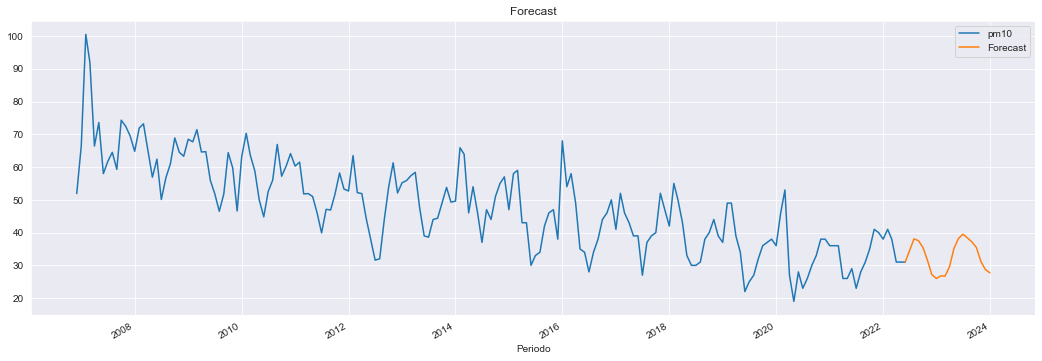

In [59]:
# generate the input and output sequences
n_lookback = 18  # length of input sequences (lookback period)
n_forecast = 18  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model_pm10.predict(X_).reshape(-1, 1)

# organize the results in a data frame
df_past = pm10[['Periodo', 'pm10']]
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['pm10'].iloc[-1]

df_future = pd.DataFrame(columns=['Periodo', 'pm10', 'Forecast'])
df_future['Periodo'] = pd.date_range(start=df_past['Periodo'].iloc[-1] + pd.Timedelta(days=31), periods=n_forecast, freq='M')
df_future['Forecast'] = Y_.flatten()
df_future['pm10'] = np.nan

results = df_past.append(df_future).set_index('Periodo')

# plot the results
results.plot(title='Forecast', figsize=(18, 6));

In [60]:
results.tail()

,pm10,Forecast
Periodo,,
2023-08-31,NaN,37.141613
2023-09-30,NaN,35.470570
2023-10-31,NaN,31.211464
2023-11-30,NaN,28.749321
2023-12-31,NaN,27.734396


## Pronóstico pm2.5:

In [61]:
pm2_5[['Periodo', 'pm2_5']]

,Periodo,pm2_5
0,2013-10-01,19.000000
1,2013-11-01,23.400000
2,2013-12-01,18.333333
3,2014-01-01,19.800000
4,2014-02-01,31.833333
...,...,...
100,2022-02-01,23.055556
101,2022-03-01,20.277778
102,2022-04-01,17.055556
103,2022-05-01,13.842105


In [62]:
X, y = split_sequence(pm2_5['pm2_5'], 18)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model_pm2_5 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, 
                         kernel_size=3, 
                         strides=1, 
                         activation="relu", 
                         padding='causal', 
                         input_shape=[None, 1]),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_pm2_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 128)         512       
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [63]:
# Set the training parameters
model_pm2_5.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

# Train the model
history_pm2_5 = model_pm2_5.fit(X, y, epochs=100)

Epoch 1/100
3/3 [==============================] - 7s 76ms/step - loss: 16.9720
Epoch 2/100
3/3 [==============================] - 0s 79ms/step - loss: 15.9908
Epoch 3/100
3/3 [==============================] - 0s 64ms/step - loss: 14.4622
Epoch 4/100
3/3 [==============================] - 0s 65ms/step - loss: 12.1863
Epoch 5/100
3/3 [==============================] - 0s 64ms/step - loss: 8.9391
Epoch 6/100
3/3 [==============================] - 0s 65ms/step - loss: 4.9697
Epoch 7/100
3/3 [==============================] - 0s 63ms/step - loss: 4.2325
Epoch 8/100
3/3 [==============================] - 0s 65ms/step - loss: 5.2411
Epoch 9/100
3/3 [==============================] - 0s 66ms/step - loss: 4.4512
Epoch 10/100
3/3 [==============================] - 0s 65ms/step - loss: 3.4283
Epoch 11/100
3/3 [==============================] - 0s 65ms/step - loss: 3.5846
Epoch 12/100
3/3 [==============================] - 0s 65ms/step - loss: 3.9031
Epoch 13/100
3/3 [===========================

1/1 [==============================] - 2s 2s/step


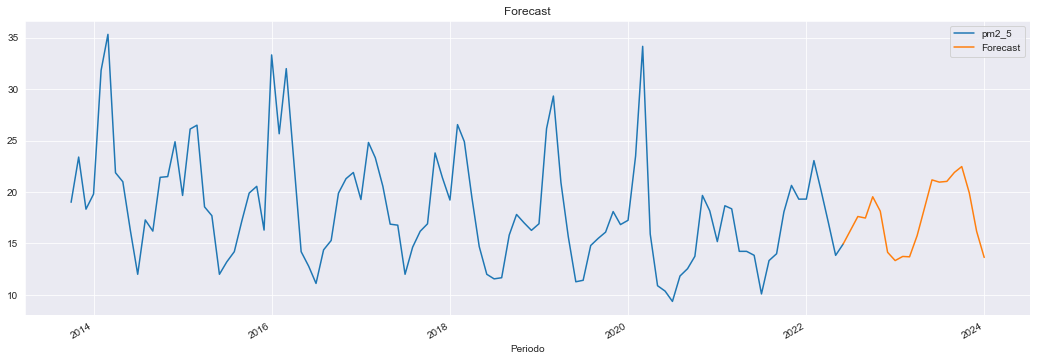

In [64]:
# generate the input and output sequences
n_lookback = 18  # length of input sequences (lookback period)
n_forecast = 18  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model_pm2_5.predict(X_).reshape(-1, 1)

# organize the results in a data frame
df_past = pm2_5[['Periodo', 'pm2_5']]
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['pm2_5'].iloc[-1]

df_future = pd.DataFrame(columns=['Periodo', 'pm2_5', 'Forecast'])
df_future['Periodo'] = pd.date_range(start=df_past['Periodo'].iloc[-1] + pd.Timedelta(days=31), periods=n_forecast, freq='M')
df_future['Forecast'] = Y_.flatten()
df_future['pm2_5'] = np.nan

results_2_5 = df_past.append(df_future).set_index('Periodo')

# plot the results
results_2_5.plot(title='Forecast', figsize=(18, 6));


In [65]:
results_2_5.tail()

,pm2_5,Forecast
Periodo,,
2023-08-31,NaN,21.909019
2023-09-30,NaN,22.475710
2023-10-31,NaN,19.909889
2023-11-30,NaN,16.178061
2023-12-31,NaN,13.639490


## Pronóstico $NO_2$

In [66]:
NO2

,Periodo,NO2ppb
0,2005,13.82
1,2006,19.42
2,2007,16.25
3,2008,16.25
4,2009,21.30
5,2010,20.50
6,2011,17.80
7,2012,15.50
8,2013,15.90
9,2014,16.40


In [67]:
X, y = split_sequence(NO2['NO2ppb'], 6)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model_NO2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=False, input_shape=[None, 1]),
    tf.keras.layers.Dense(528, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_NO2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 528)               68112     
                                                                 
 dense_1 (Dense)             (None, 1)                 529       
                                                                 
Total params: 135,201
Trainable params: 135,201
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Set the training parameters
model_NO2.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

# Train the model
history_NO2 = model_NO2.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 16.2531
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 15.4934
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 14.7956
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 14.1200
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.4387
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7173
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9453
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1154
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 10.2023
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 9.1990
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0997
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8636
Epoch 13/100
1/1 [========================

1/1 [==============================] - 1s 687ms/step


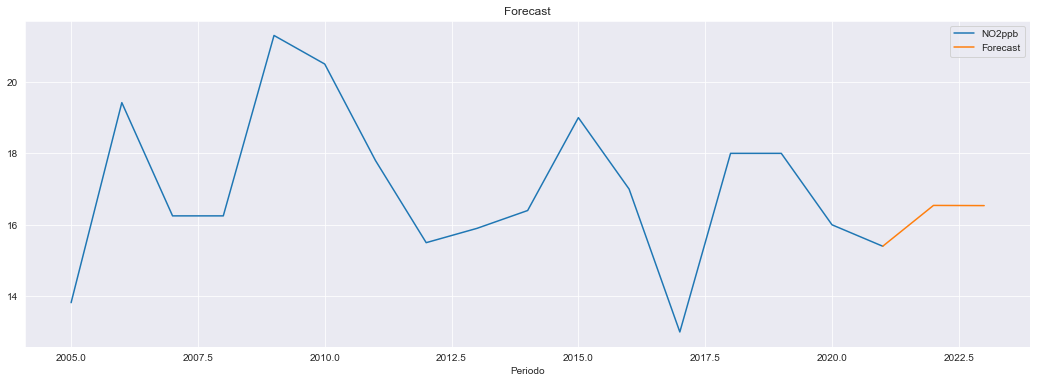

In [69]:
# generate the input and output sequences
n_lookback = 6  # length of input sequences (lookback period)
n_forecast = 6  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model_NO2.predict(X_).reshape(-1, 1)

# organize the results in a data frame
df_past = NO2[['Periodo', 'NO2ppb']]
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['NO2ppb'].iloc[-1]

df_future = pd.DataFrame(columns=['Periodo', 'NO2ppb', 'Forecast'])
df_future['Periodo'] = pd.date_range(start=str(df_past['Periodo'].iloc[-1]+1), periods=n_forecast, freq='Y')
df_future['Periodo'] = pd.to_datetime(df_future['Periodo']).dt.year
df_future['Forecast'] = Y_.flatten()
df_future['NO2ppb'] = np.nan

results_NO2 = df_past.append(df_future).set_index('Periodo')
results_NO2 = results_NO2.iloc[:-4,:]

# plot the results
results_NO2.plot(title='Forecast', figsize=(18, 6));

In [70]:
results_NO2.tail()

,NO2ppb,Forecast
Periodo,,
2019,18.0,NaN
2020,16.0,NaN
2021,15.4,15.400000
2022,NaN,16.542570
2023,NaN,16.537382


## Pronóstico $SO_2$

In [71]:
SO2

,Periodo,SO2ppb
0,1999,16.7
1,2000,16.6
2,2001,12.6
3,2002,11.1
4,2003,10.5
5,2004,13.1
6,2005,9.0
7,2006,6.1
8,2007,6.8
9,2008,9.2


In [72]:
X, y = split_sequence(SO2['SO2ppb'], 6)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the Model
model_SO2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=False, input_shape=[None, 1]),
    tf.keras.layers.Dense(528, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_SO2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 528)               68112     
                                                                 
 dense_1 (Dense)             (None, 1)                 529       
                                                                 
Total params: 135,201
Trainable params: 135,201
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Set the training parameters
model_SO2.compile(loss=tf.keras.losses.Huber(), optimizer='adam')

# Train the model
history_SO2 = model_SO2.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.5166
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 3.0581
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 2.6240
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 2.2015
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 1.7864
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 1.4106
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 1.1578
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 1.0572
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 1.0857
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 1.1628
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 1.2266
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 1.2269
Epoch 13/100
1/1 [==============================] -

1/1 [==============================] - 1s 556ms/step


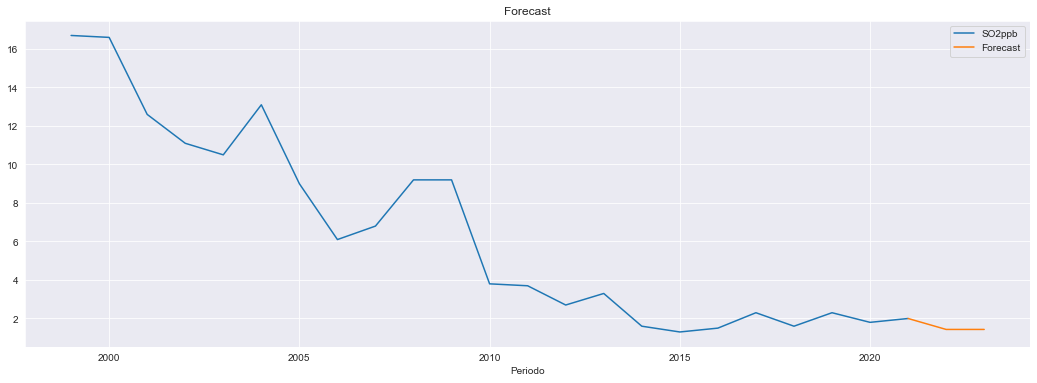

In [74]:
# generate the input and output sequences
n_lookback = 6  # length of input sequences (lookback period)
n_forecast = 6  # length of output sequences (forecast period)

# generate the forecasts
X_ = X[- n_lookback:]  # last available input sequence
X_ = X_.reshape(n_forecast, n_lookback, 1)

Y_ = model_SO2.predict(X_).reshape(-1, 1)

# organize the results in a data frame
df_past = SO2[['Periodo', 'SO2ppb']]
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['SO2ppb'].iloc[-1]

df_future = pd.DataFrame(columns=['Periodo', 'SO2ppb', 'Forecast'])
df_future['Periodo'] = pd.date_range(start=str(df_past['Periodo'].iloc[-1]+1), periods=n_forecast, freq='Y')
df_future['Periodo'] = pd.to_datetime(df_future['Periodo']).dt.year
df_future['Forecast'] = Y_.flatten()
df_future['SO2ppb'] = np.nan

results_SO2 = df_past.append(df_future).set_index('Periodo')
results_SO2 = results_SO2.iloc[:-4,:]

# plot the results
results_SO2.plot(title='Forecast', figsize=(18, 6));

In [75]:
results_SO2.tail()

,SO2ppb,Forecast
Periodo,,
2019,2.3,NaN
2020,1.8,NaN
2021,2.0,2.000000
2022,NaN,1.431845
2023,NaN,1.432119


## Pronóstico porcentaje de sibilancias para mayores de 60 años durante 2022 y 2023:

Con los resultados de los pronósticos para las series de tiempo, ahora procedemos a estimar los porcentajes de sibilancias para 2022 y 2023.

In [76]:
# Agrupamos los resultados de los modelos anteriores en su promedio anual para 2022 y 2023:
# pm10:
results_10 = results.reset_index()
results_10['Year'] = results_10['Periodo'].dt.year
results_10_anual = results_10.groupby('Year').mean()
results_10_anual = results_10_anual['Forecast'].tail(2)
results_10_anual = pd.Series(results_10_anual.reset_index(drop=True))

# pm2.5:
results_2_5 = results_2_5.reset_index()
results_2_5['Year'] = results_2_5['Periodo'].dt.year
results_2_5_anual = results_2_5.groupby('Year').mean()
results_2_5_anual = results_2_5_anual['Forecast'].tail(2)
results_2_5_anual = pd.Series(results_2_5_anual.reset_index(drop=True))

# NO2 y SO2:
results_NO2_anual = pd.Series(results_NO2.reset_index()['Forecast'].tail(2).reset_index(drop=True))
results_SO2_anual = pd.Series(results_SO2['Forecast'].tail(2).reset_index(drop=True))

# Los combinamos en un solo dataframe:
df_2 = pd.DataFrame()
df_2['pm10'] = results_10_anual
df_2['pm2_5'] = results_2_5_anual
df_2['NO2'] = results_NO2_anual
df_2['SO2'] = results_SO2_anual

df_2

,pm10,pm2_5,NO2,SO2
0,32.391356,16.455852,16.542570,1.431845
1,32.897596,18.241243,16.537382,1.432119


In [77]:
# Generamos el pronóstico con nuestra red neuronal:
sibil_pronostico = model.predict(df_2)

1/1 [==============================] - 0s 53ms/step


In [86]:
# Combinamos los resultados obtenidos con los registros históricos:
sibilancias = pd.concat([sibilancias_anual[['Sibil']], 
                         pd.DataFrame(sibil_pronostico.reshape(-1), 
                                      index=[9, 10], columns=['Sibil'])])

sibilancias['Año'] = pd.date_range(start='2013', periods=11, freq='Y')
sibilancias['Año'] = pd.to_datetime(sibilancias['Año'], format='%Y').dt.year
sibilancias.index = sibilancias['Año']
sibilancias.pop('Año')
sibilancias

,Sibil
Año,
2013,0.145942
2014,0.171385
2015,0.098474
2016,0.112512
2017,0.152349
2018,0.135619
2019,0.127857
2020,0.043711
2021,0.033458


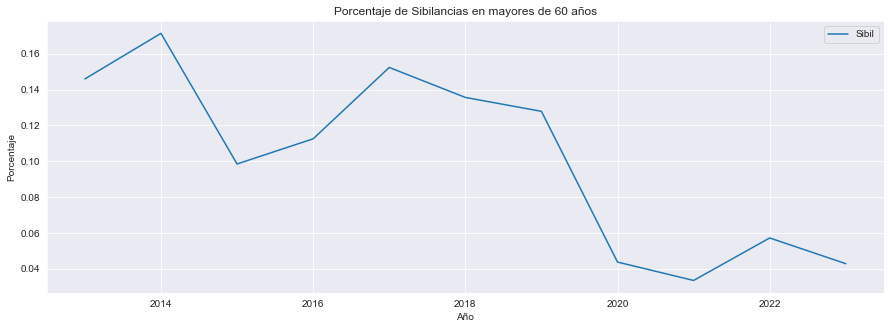

In [87]:
# Graficamos:
plt.subplots(figsize=(15,5))
sns.lineplot(data=sibilancias)
plt.title('Porcentaje de Sibilancias en mayores de 60 años')
plt.ylabel('Porcentaje')
plt.show()

Los resultados de nuestro modelo indican que para el 2022 y 2023 se debe esperar una subida de los casos de sibilancias en adultos mayores a 60 años en Bogotá. De acuerdo con los modelos, este resultado se puede esperar, en mayor medida, debido al comportamiento con tendencia al aumento de la concentración del material particulado pm10 y del $NO_2$ en el aire de la ciudad.